In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy: 0.982
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



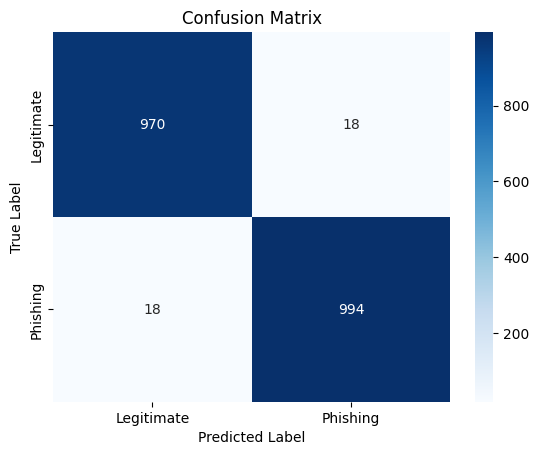

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the data


df = pd.read_csv('/content/sample_data/Phishing_Legitimate_full.csv')
X = df.drop(columns=['id', 'CLASS_LABEL'])  # Features
y = df['CLASS_LABEL']  # Target variable

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions
y_pred = clf.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
report = classification_report(y_test, y_pred)
print(report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# New Section

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and evaluate the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after tuning: 0.9835
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.981
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

